## Deep Learning

In [1]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

Using TensorFlow backend.


### Image Classification (MNIST)

In [2]:
# Training Base and Test Base
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Text(0.5, 1.0, '4')

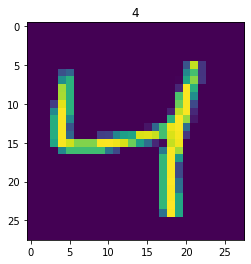

In [3]:
plt.imshow(X_train[2])
plt.title(Y_train[2])

#### Preprocessing

In [4]:
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

##### Data Normalization

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [6]:
Y_train = np_utils.to_categorical(Y_train, num_classes=10)
Y_test = np_utils.to_categorical(Y_test, num_classes=10)

#### Model

In [7]:
model = Sequential()

# First Layer - 64; Neurons = 784 Attributes (input)
# Add 64 Neurons in the first hidden layer
model.add(Dense(units=64, input_dim=784, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [9]:
%%time

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
historic = model.fit(X_train, Y_train, epochs=20,
                     validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.4519 - accuracy: 0.8617 - val_loss: 0.1784 - val_accuracy: 0.9445

In [12]:
historic.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

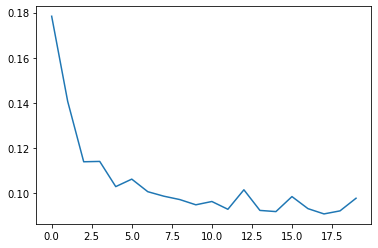

In [19]:
plt.plot(historic.history['val_loss'])

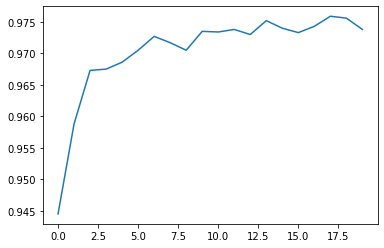

In [20]:
plt.plot(historic.history['val_accuracy'])

#### Predictions

In [21]:
predictions = model.predict(X_test)

In [22]:
Y_test_matrix = [np.argmax(t) for t in Y_test]
Y_predictions_matrix = [np.argmax(t) for t in predictions]

#### Confusion Matrix

In [23]:
confusion = confusion_matrix(Y_test_matrix, Y_predictions_matrix)

In [28]:
Y_train[20]
new = X_train[20]
new = np.expand_dims(new, axis=0)
pred = model.predict(new)
